<a href="https://colab.research.google.com/github/XxDavexXX/fullventasportal/blob/main/M%C3%93DULO_2_SSIS_Carga_y_administraci%C3%B3n_de_paquetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table border=1 width='99%'>
<tr>
<td bgcolor='#B00A0F'>

# **<font color="#FFFFFF"> MÓDULO 2: SSIS - Carga y administración de paquetes</font>**
</td>
</tr>
</table>

<center>

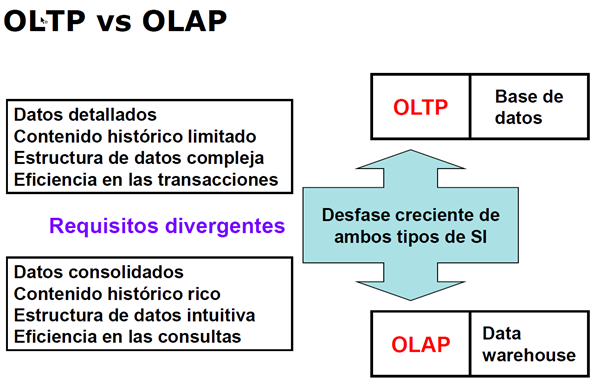

</center>

[Bases de datos de ejemplo AdventureWorks](https://learn.microsoft.com/es-es/sql/samples/adventureworks-install-configure?view=sql-server-ver16&tabs=ssms)

<table width='99%'>
<tr>
<td bgcolor='#FFBA39'>

## **<font color="#000000"> Restauración de la base de datos AdventureWorks2022</font>**
</td>
</tr>
</table>

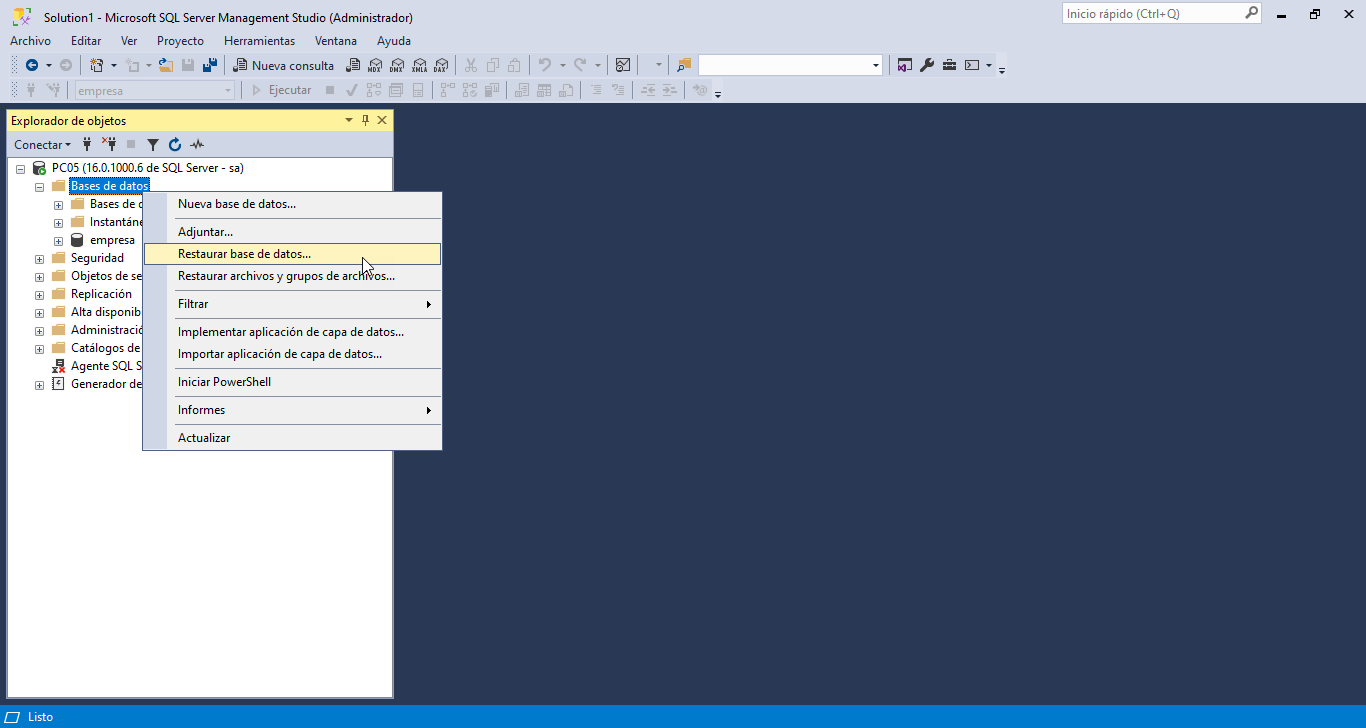

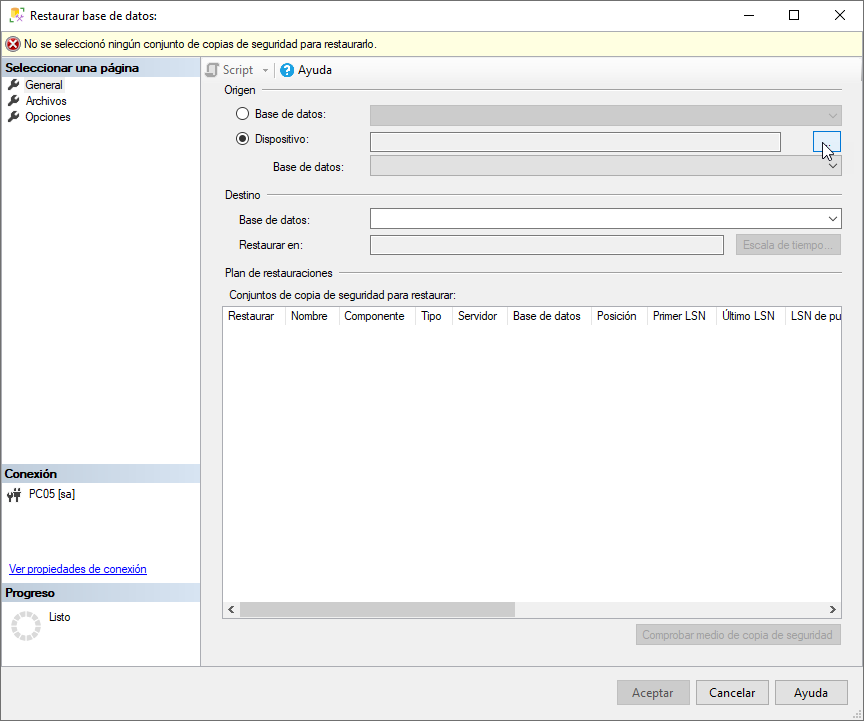

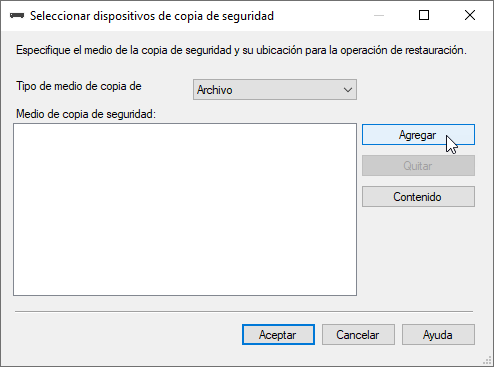

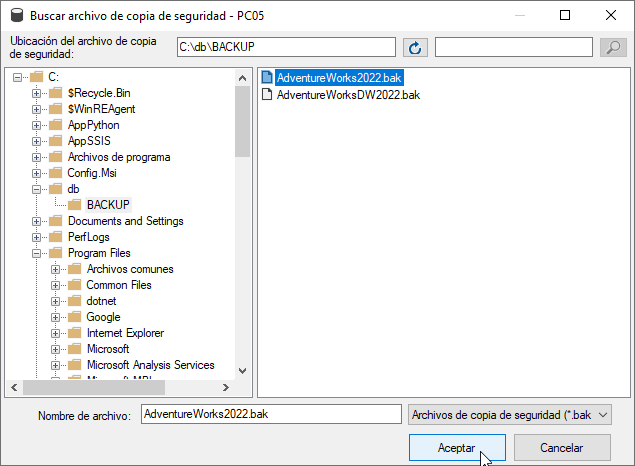

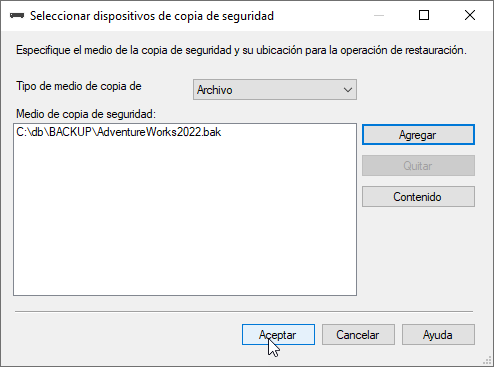

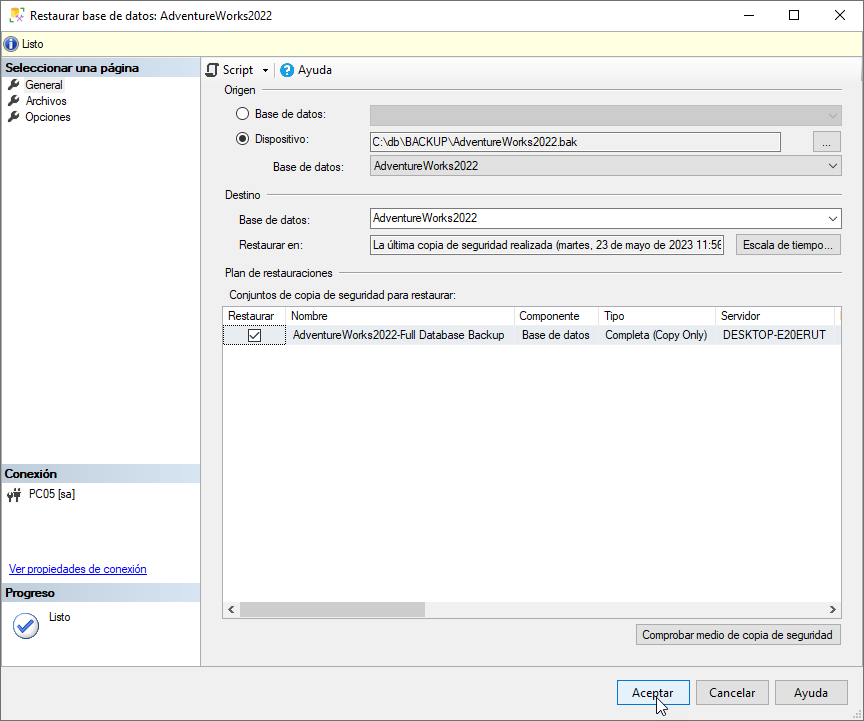

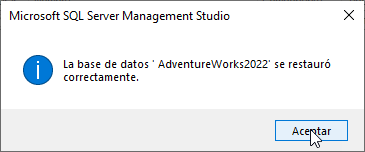

<table width='99%'>
<tr>
<td bgcolor='#FFBA39'>

## **<font color="#000000"> Restauración de la base de datos AdventureWorksDW2022</font>**
</td>
</tr>
</table>

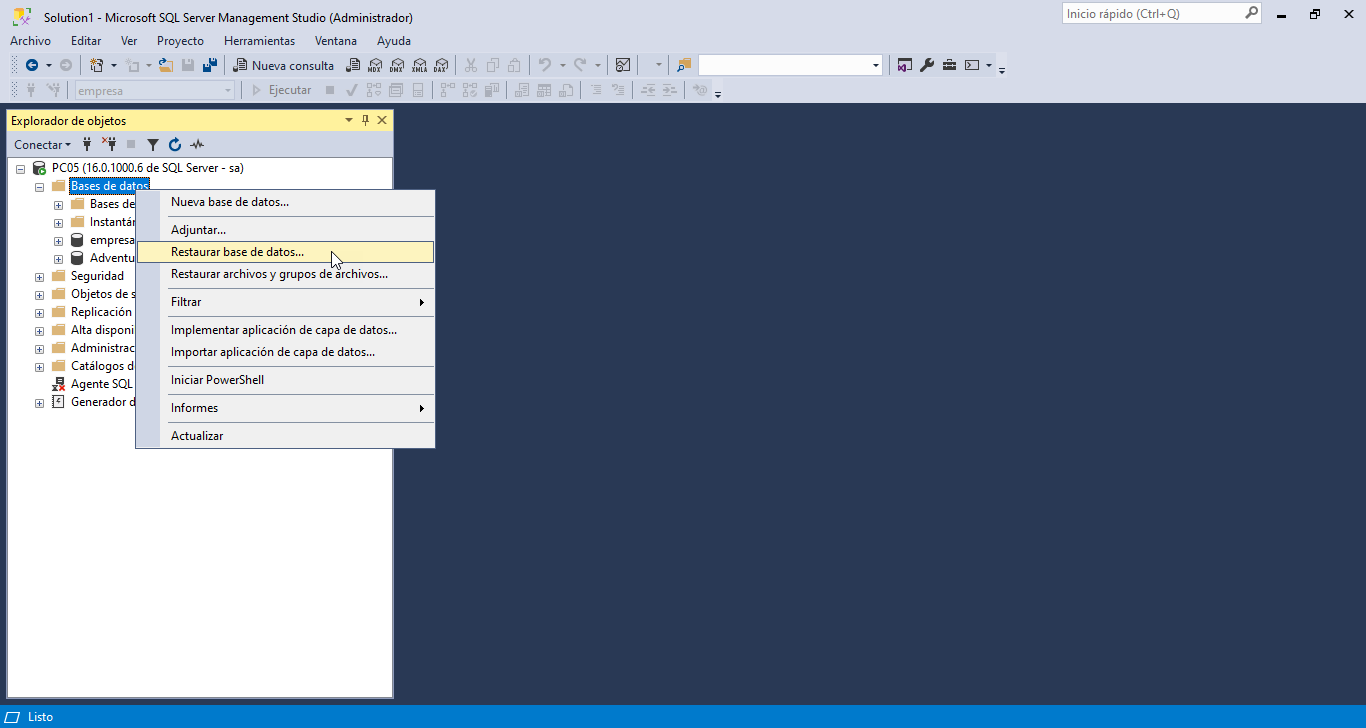

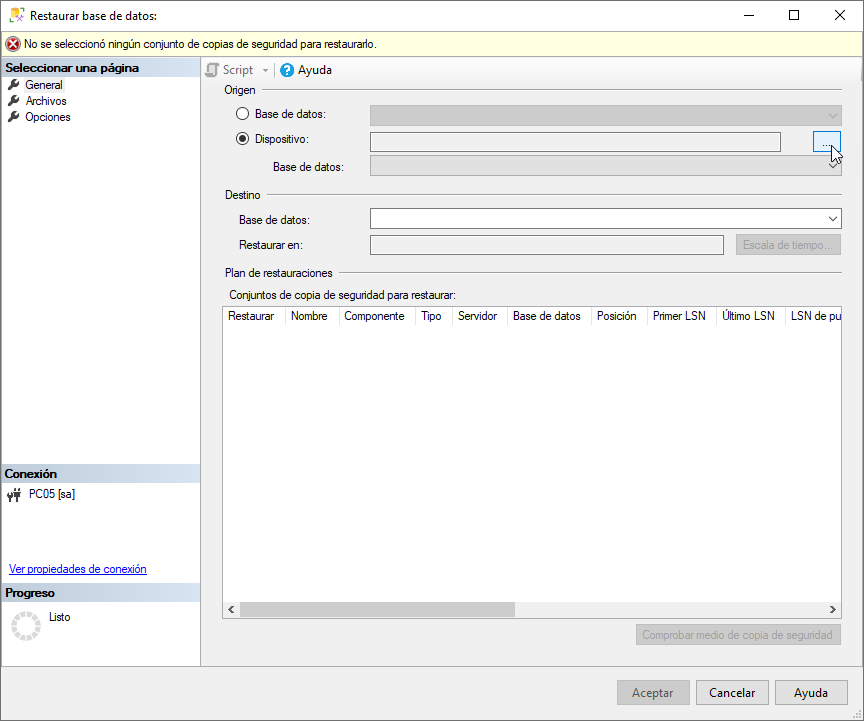

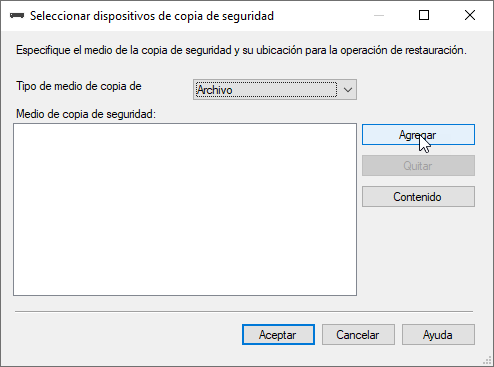

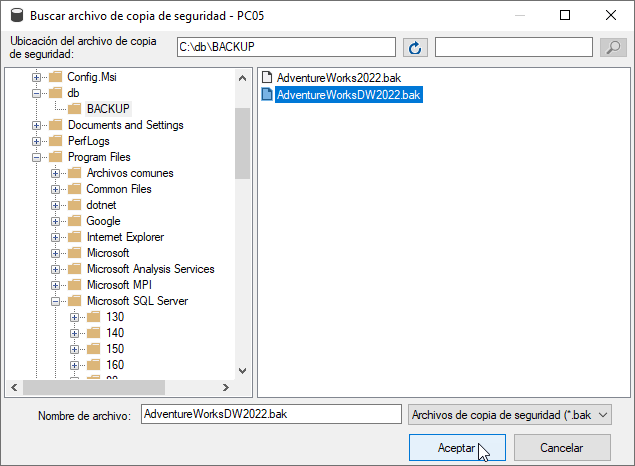

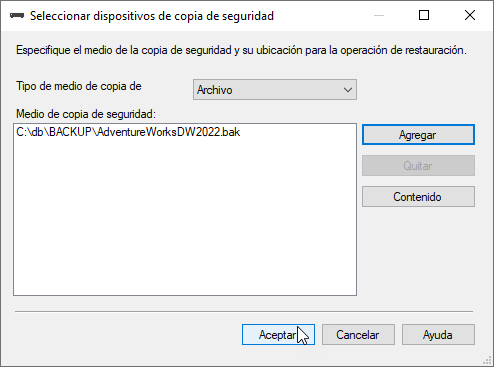

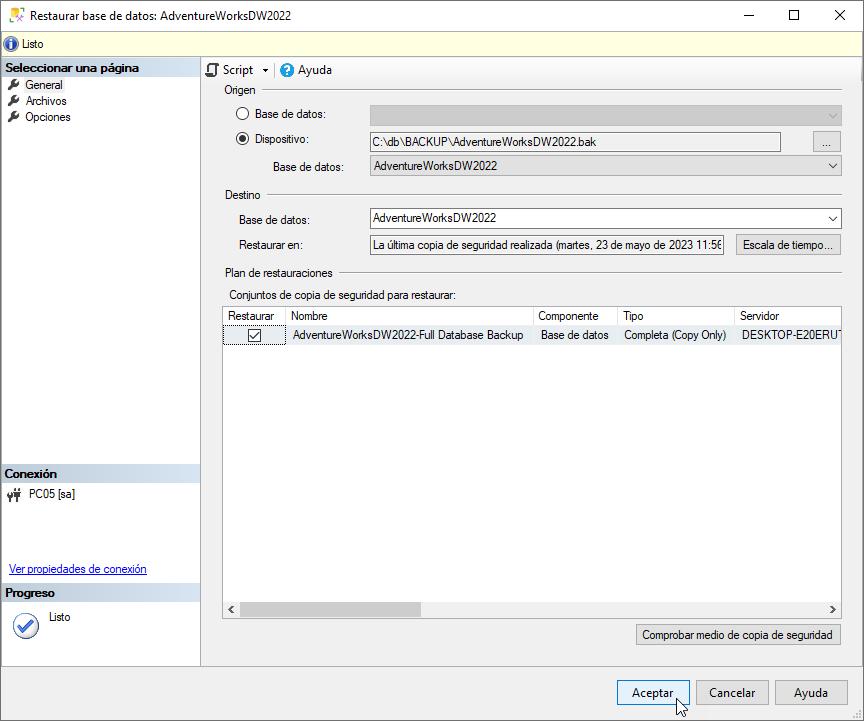

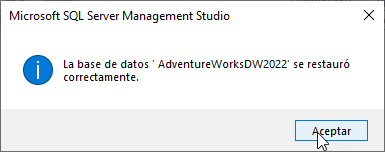

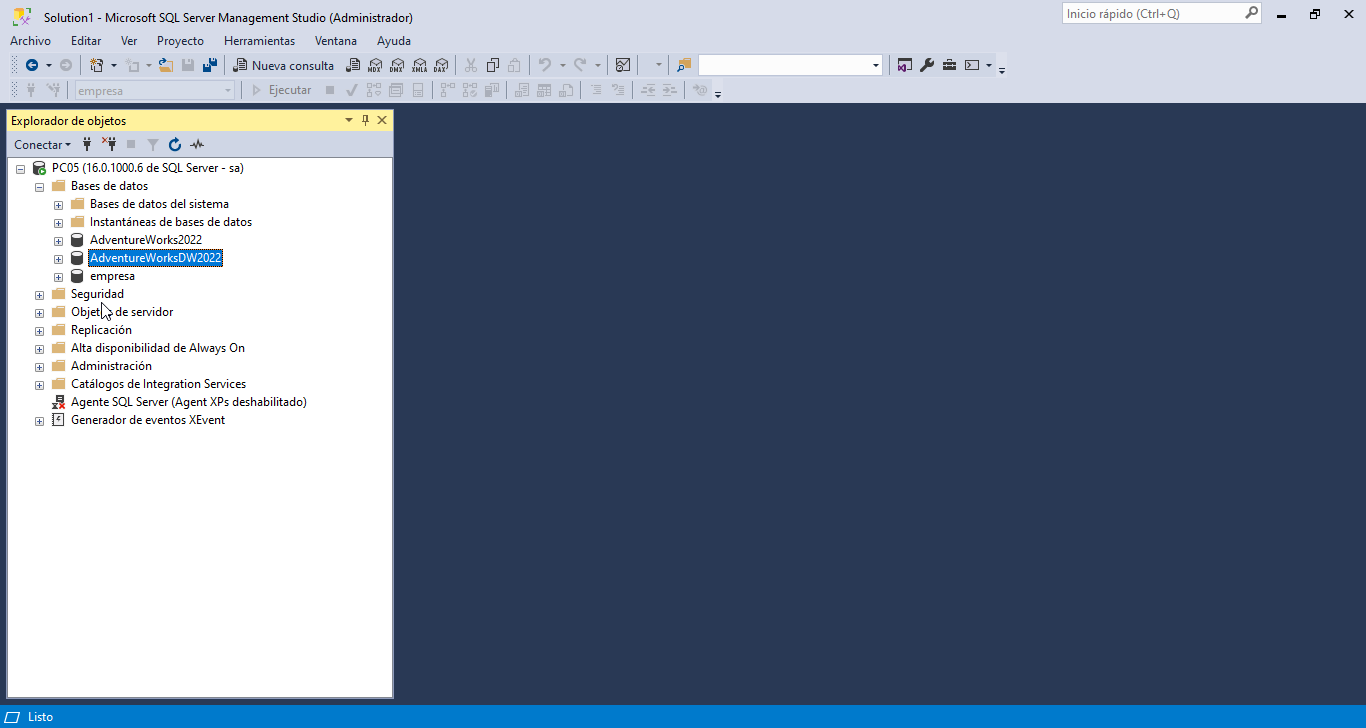

<table width='99%'>
<tr>
<td bgcolor='#FFBA39'>

## **<font color="#000000"> Base de datos Northwind</font>**
</td>
</tr>
</table>

[Base de datos Northwind](https://drive.google.com/file/d/19mJ8Q2RUPcWv9_cfHxKRiG2Dwv1kRmJC/view?usp=sharing)

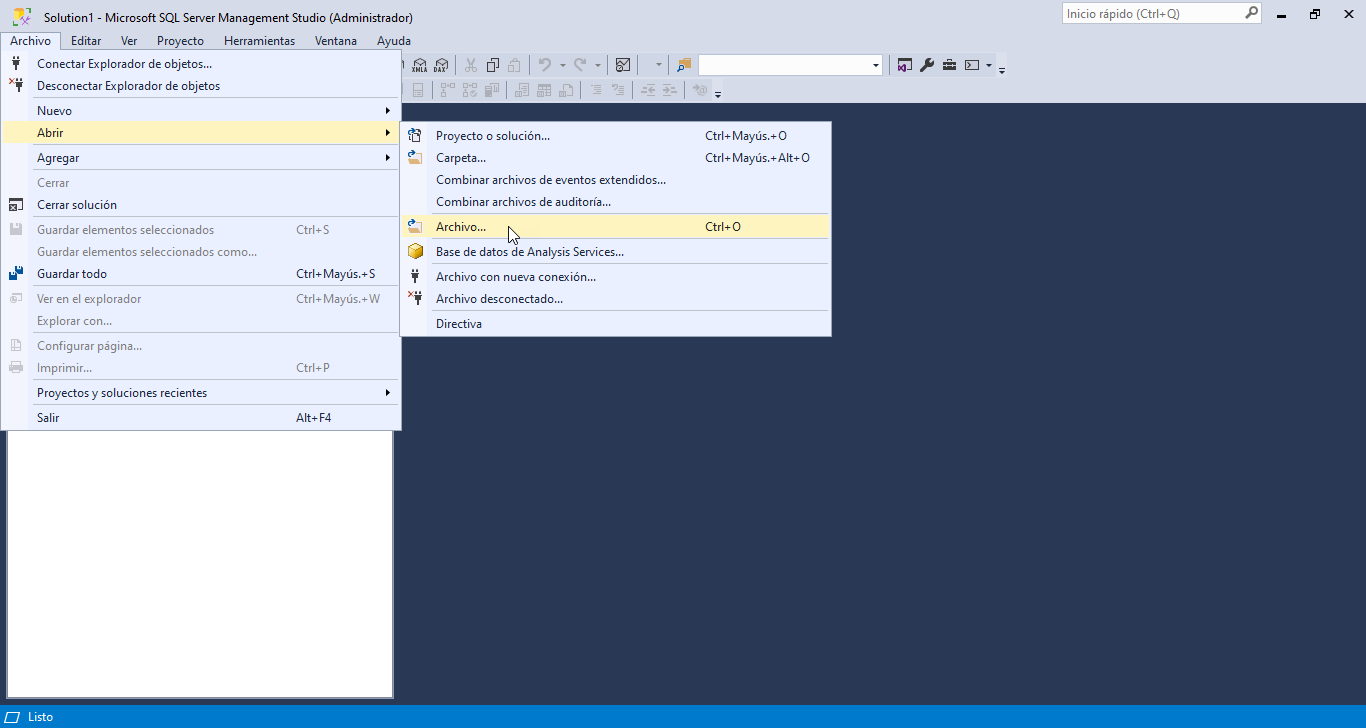

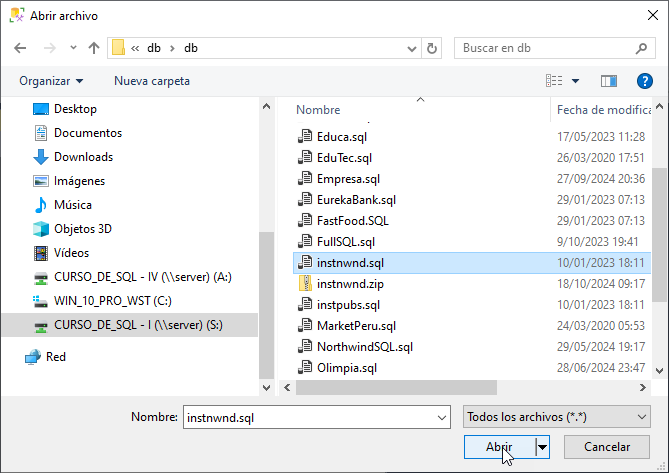

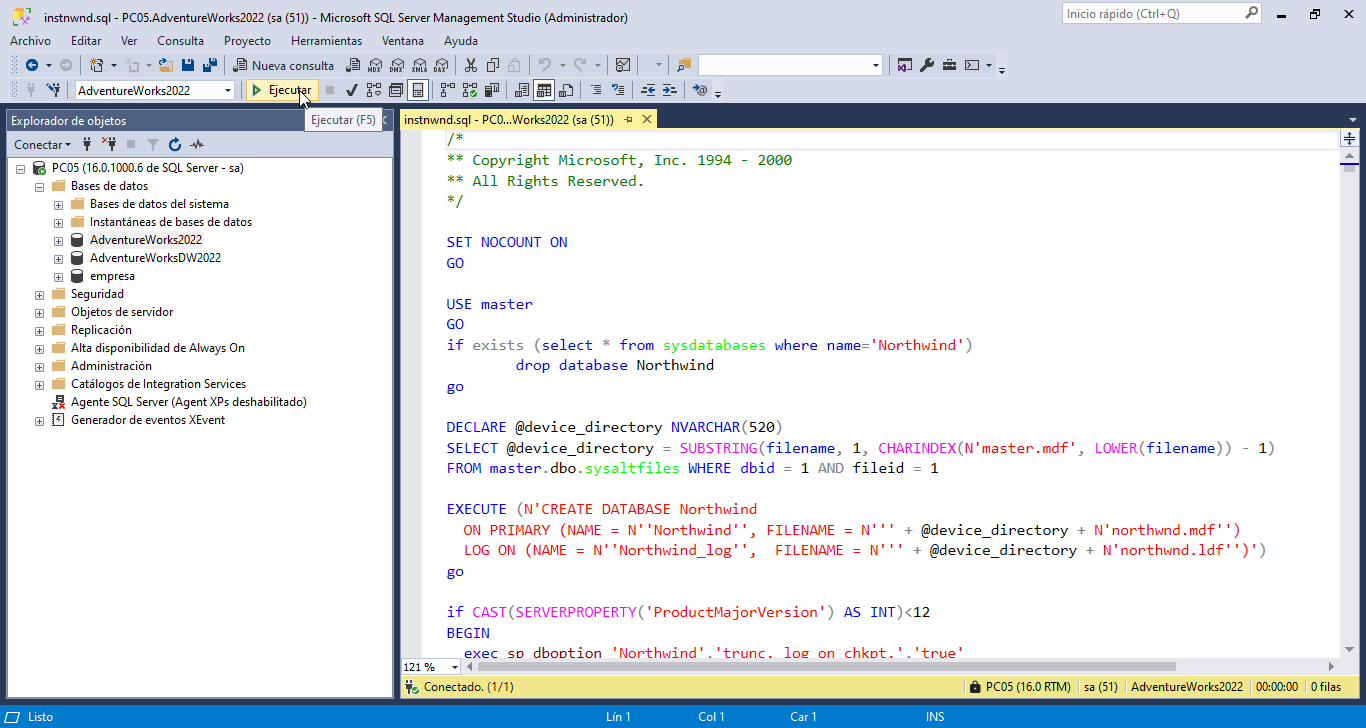

<table width='99%'>
<tr>
<td bgcolor='#FFBA39'>

## **<font color="#000000"> Copo de Nieve</font>**
</td>
</tr>
</table>

El **modelo de copo de nieve (snowflake)** es una técnica de modelado de datos utilizada en la construcción de data warehouses.

Se caracteriza por una estructura de datos normalizada, donde las tablas de **hechos** (**Fact**) están vinculadas a tablas de **dimensiones** (**Dim**) que, a su vez, pueden estar relacionadas con otras tablas de dimensiones.

Este enfoque permite una mayor flexibilidad y puede reducir la redundancia de datos.

<table width='99%'>
<tr>
<td bgcolor='#B00A0F'>

### **<font color="#FFFFFF">  Estructura del Modelo Copo de Nieve </font>**
</td>
</tr>
</table>

<table width='99%'>
<tr>
<td bgcolor='#FFBA39'>

#### **<font color="#000000"> Tabla de Hechos</font>**
</td>
</tr>
</table>

>* Contiene datos cuantitativos (medidas) y claves foráneas que se relacionan con las tablas de dimensiones.
>* Por ejemplo, una tabla de hechos de ventas podría incluir medidas como total_ventas, cantidad_vendida, y claves como id_producto, id_tienda, id_fecha.

<table width='99%'>
<tr>
<td bgcolor='#FFBA39'>

#### **<font color="#000000"> Tablas de Dimensiones</font>**
</td>
</tr>
</table>

>* Proporcionan contexto a las medidas en la tabla de hechos.
>* En un modelo copo de nieve, estas tablas pueden estar normalizadas, lo que significa que se dividen en varias tablas.
>* Por ejemplo, en lugar de tener una tabla de dimensiones de clientes que contenga todos los detalles, podrías tener:
  * **Dimensión Clientes**: Información básica del cliente (Código del nombre, nombre del cliente).
  * **Dimensión Regiones**: Información sobre la región del cliente (nombre de la región, código postal).

Esta estructura se asemeja a un copo de nieve, ya que las tablas de dimensiones se ramifican y se normalizan en lugar de ser desnormalizadas como en un modelo en estrella.

<table width='99%'>
<tr>
<td bgcolor='#B00A0F'>

### **<font color="#FFFFFF">  Implementación de un Modelo Copo de Nieve en SSIS </font>**
</td>
</tr>
</table>

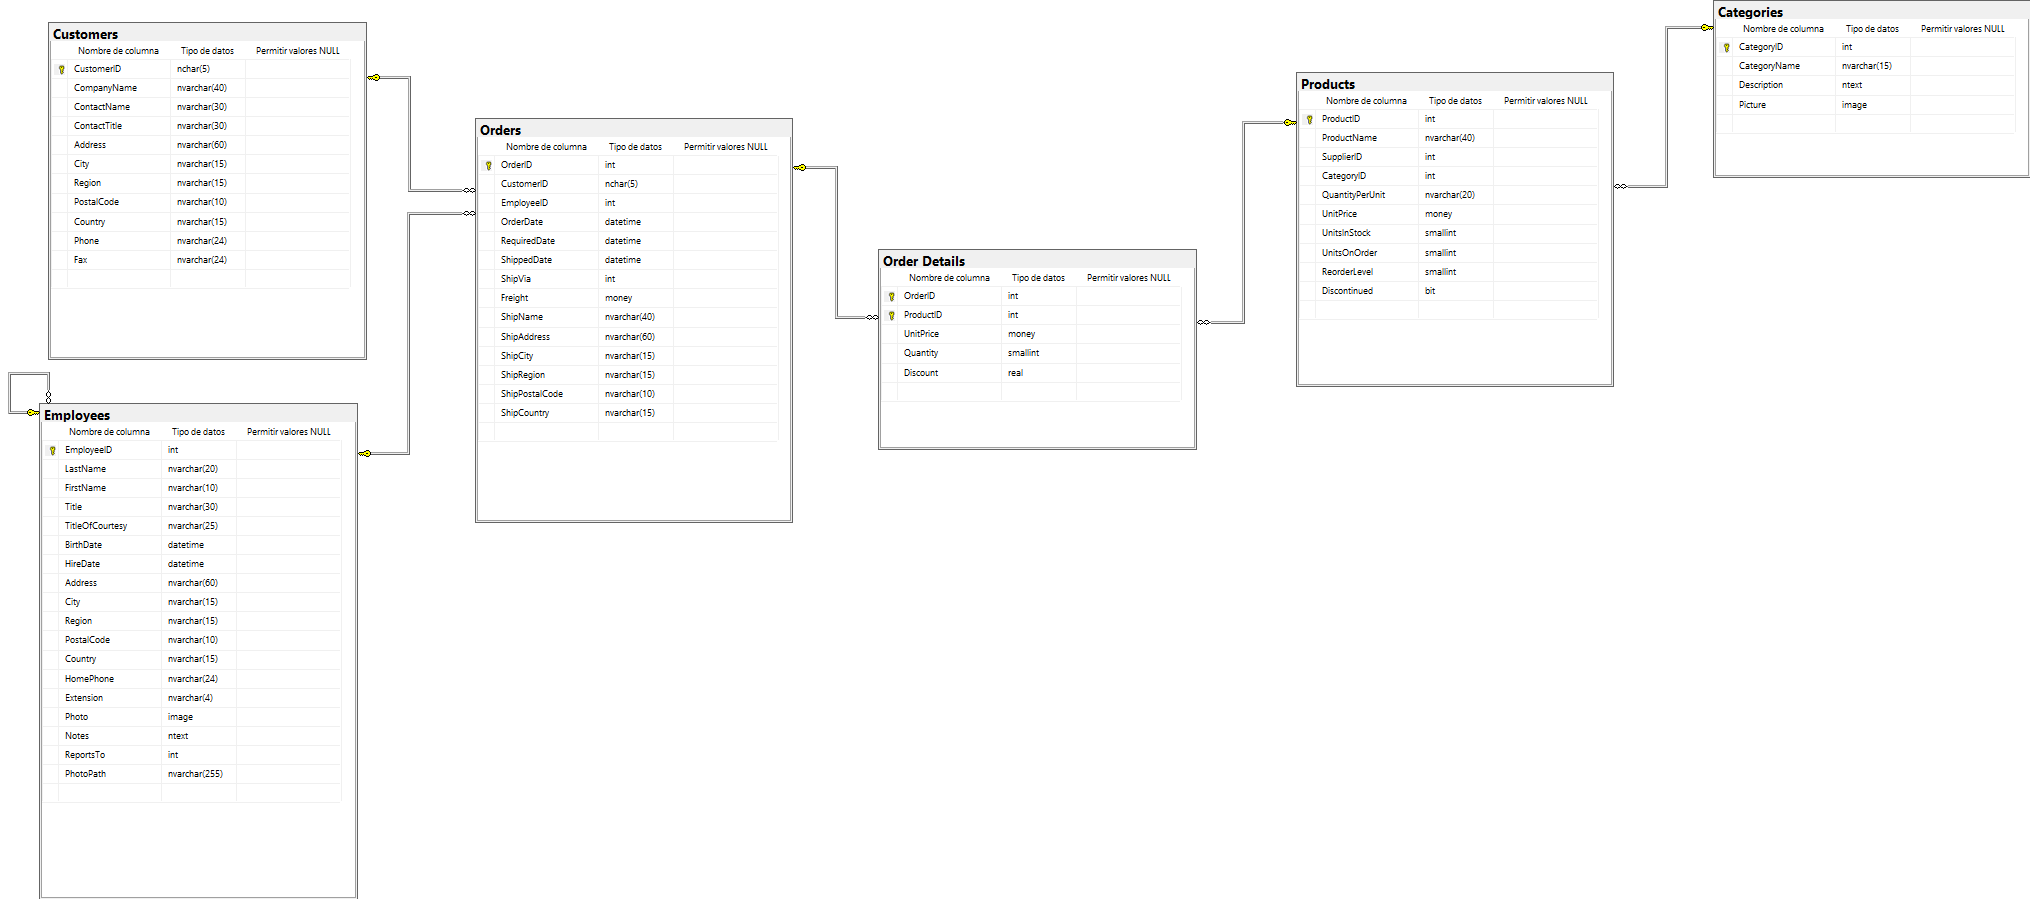

<table width='99%'>
<tr>
<td bgcolor='#B00A0F'>

##### **<font color="#FFFFFF">Creación de la base de datos Copo de nieve</font>**
</td>
</tr>
</table>



```
USE master
GO
IF EXISTS
(
    SELECT name
    FROM sysdatabases
    WHERE name = 'Northwind_copo_de_nieve_DM'
)
DROP DATABASE Northwind_copo_de_nieve_DM
GO
CREATE DATABASE Northwind_copo_de_nieve_DM
ON PRIMARY
(
    name = Northwind_copo_de_nieve_DM_dat,
    filename = 'c:\db\Northwind_copo_de_nieve_DM_dat.mdf',
    size = 30MB,
    maxsize=50MB,
    filegrowth=10MB
)
LOG ON
(
    name = Northwind_copo_de_nieve_DM_log,
    filename = 'c:\db\Northwind_copo_de_nieve_DM_log.ldf',
    size = 10MB,
    maxsize=UNLIMITED,
    filegrowth=10%
)
GO
```



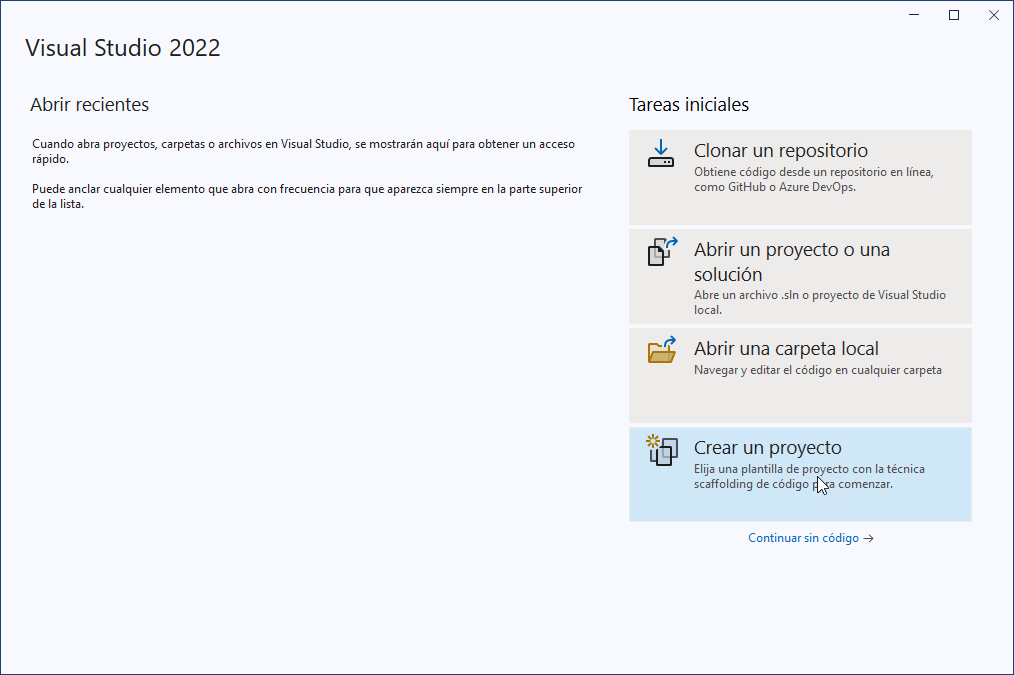

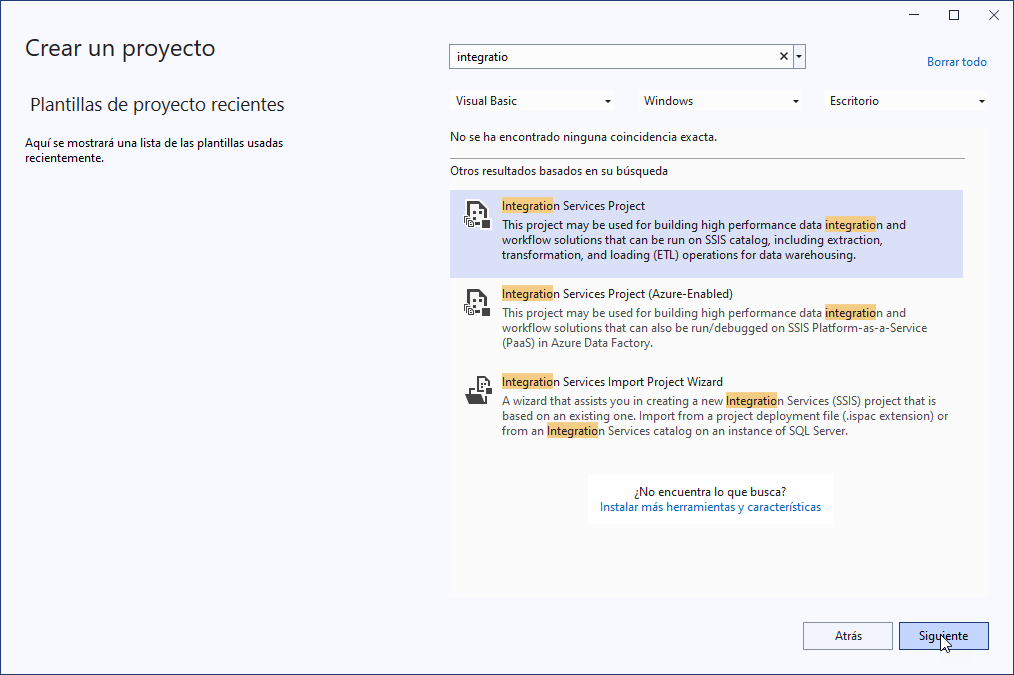

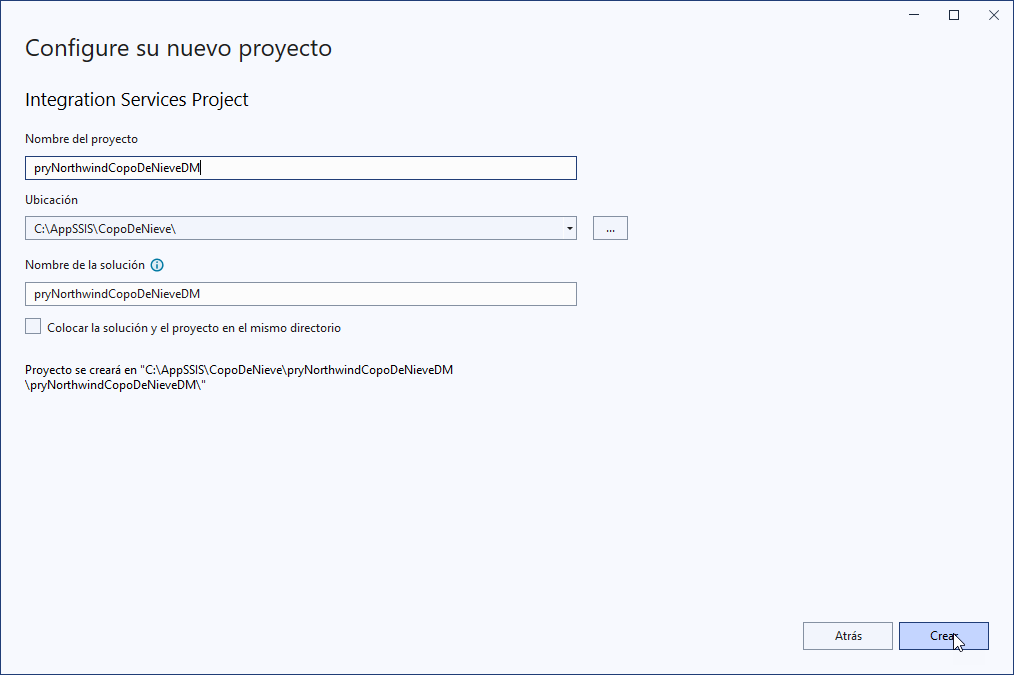

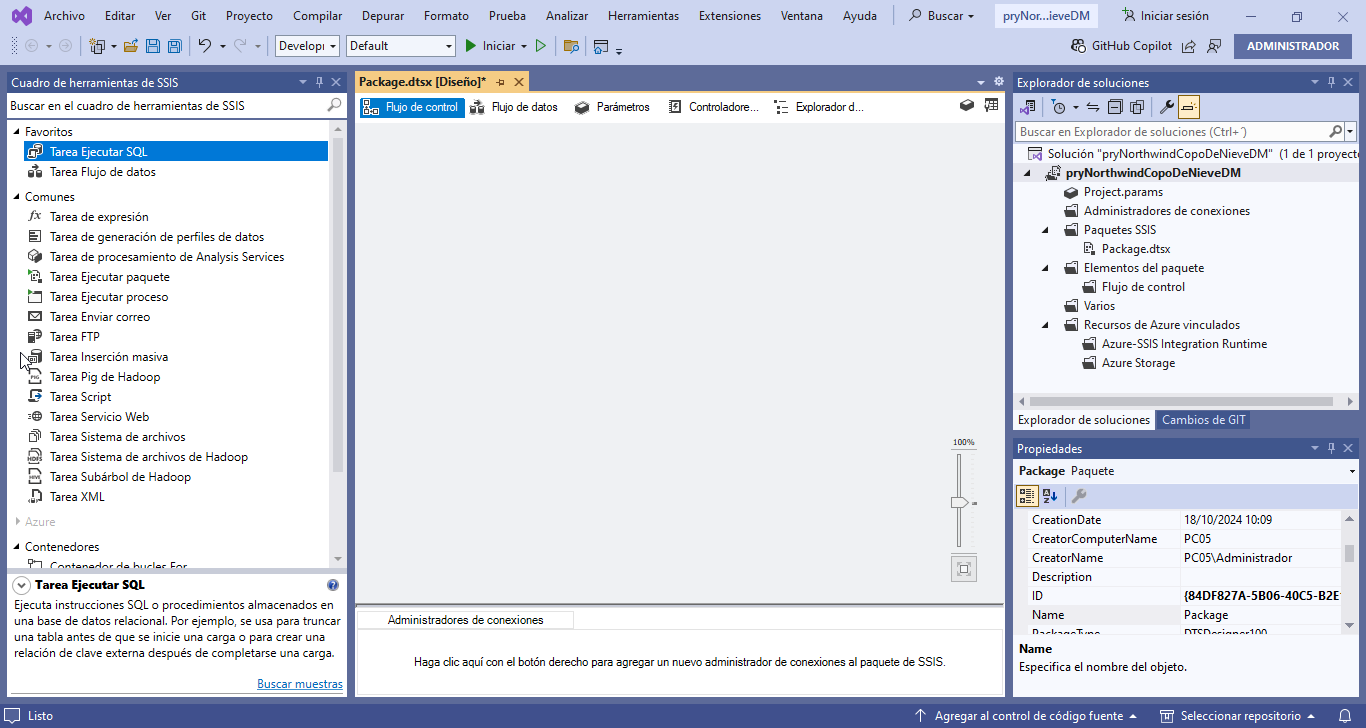

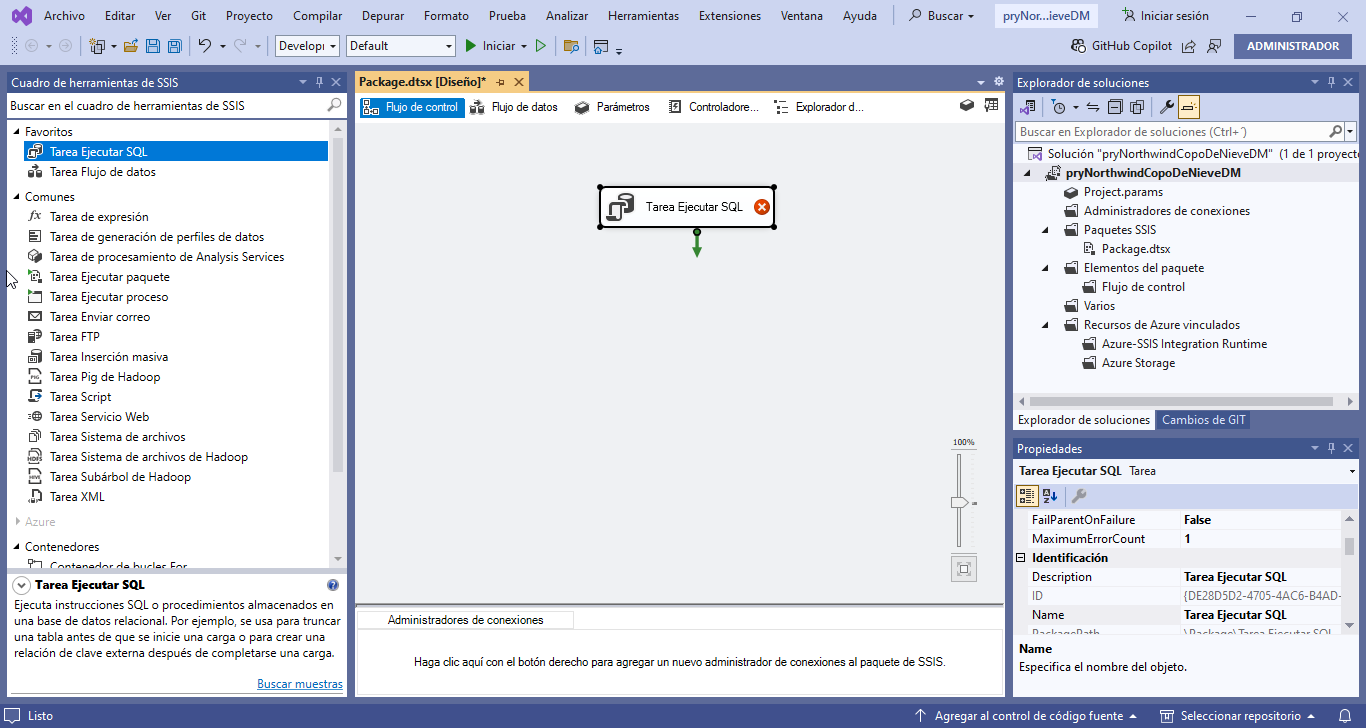

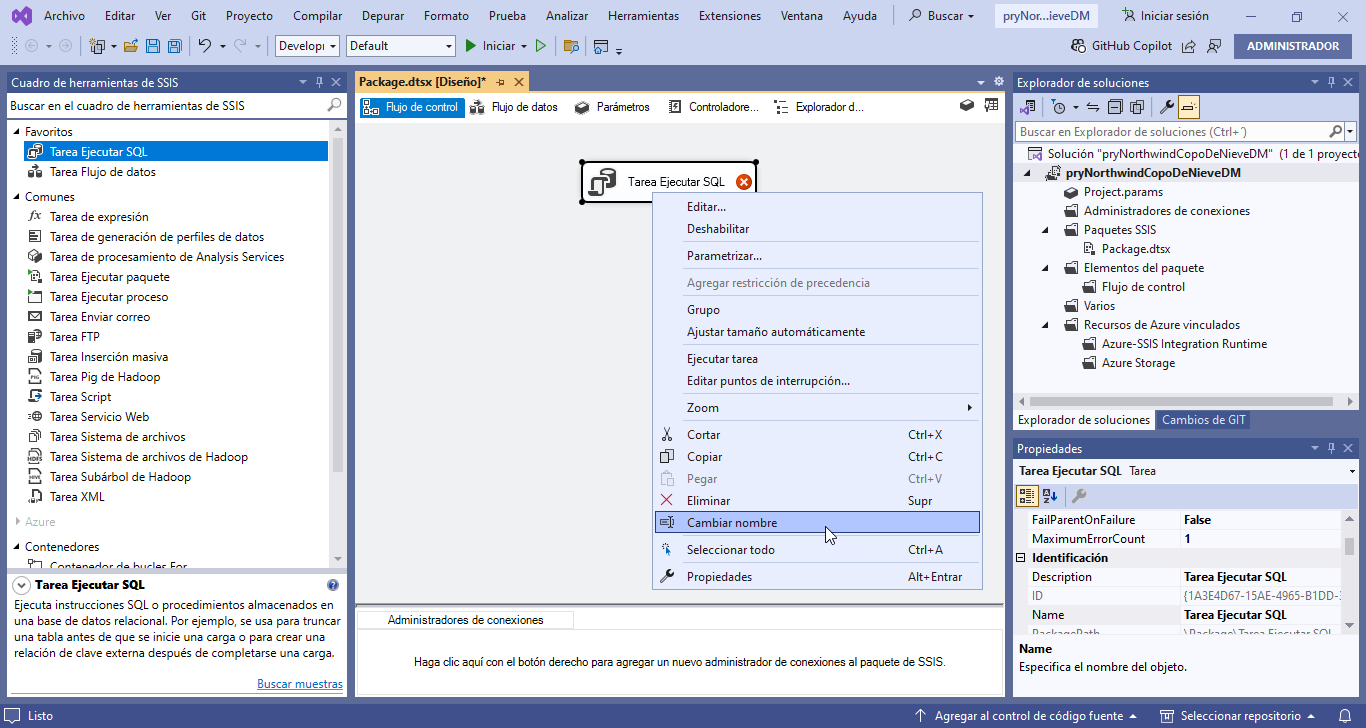

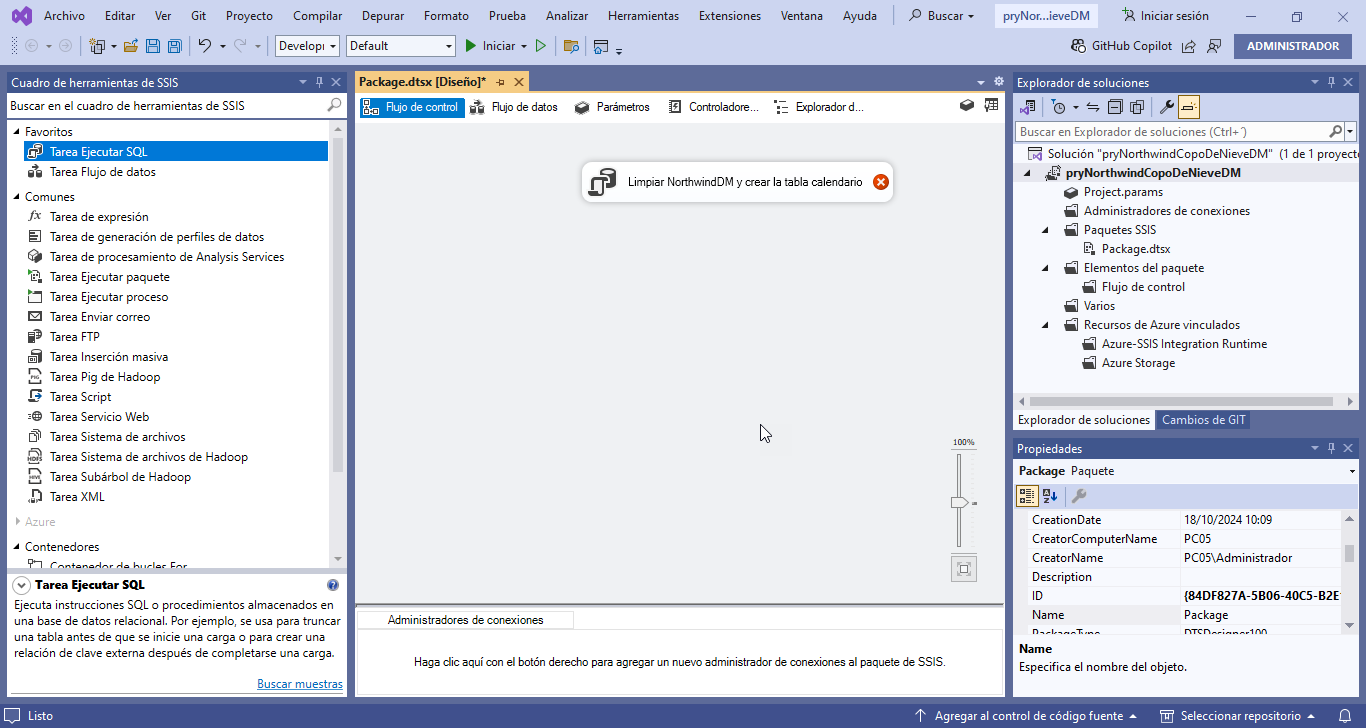



```
USE Northwind_copo_de_nieve_DM
GO
IF EXISTS
(
	SELECT name
	FROM sys.tables
	WHERE name = 'FactVentas'
)
DROP TABLE FactVentas;

IF EXISTS
(
	SELECT name
	FROM sys.tables
	WHERE name = 'DimProducto'
)
DROP TABLE DimProducto;

IF EXISTS
(
	SELECT name
	FROM sys.tables
	WHERE name = 'DimCalendario'
)
DROP TABLE DimCalendario;


IF EXISTS
(
	SELECT name
	FROM sys.tables
	WHERE name = 'DimCategoria'
)
DROP TABLE DimCategoria;

IF EXISTS
(
	SELECT name
	FROM sys.tables
	WHERE name = 'DimEmpleado'
)
DROP TABLE DimEmpleado;

IF EXISTS
(
	SELECT name
	FROM sys.tables
	WHERE name = 'DimCliente'
)
DROP TABLE DimCliente;

CREATE TABLE [dbo].[DimProducto](
	[ProductID] [int] IDENTITY(1,1) NOT NULL,
	[ProductName] [nvarchar](40) NOT NULL,
	[SupplierID] [int] NULL,
	[CategoryID] [int] NULL,
	[QuantityPerUnit] [nvarchar](20) NULL,
	[UnitPrice] [money] NULL,
	[UnitsInStock] [smallint] NULL,
	[UnitsOnOrder] [smallint] NULL,
	[ReorderLevel] [smallint] NULL,
	[Discontinued] [bit] NOT NULL,
	CONSTRAINT [PK_Products] PRIMARY KEY CLUSTERED
	(
		[ProductID] ASC
	)
);

CREATE TABLE [dbo].[DimEmpleado](
	[EmployeeID] [int] IDENTITY(1,1) NOT NULL,
	[LastName] [nvarchar](20) NOT NULL,
	[FirstName] [nvarchar](10) NOT NULL,
	[Title] [nvarchar](30) NULL,
	[TitleOfCourtesy] [nvarchar](25) NULL,
	[BirthDate] [datetime] NULL,
	[HireDate] [datetime] NULL,
	[Address] [nvarchar](60) NULL,
	[City] [nvarchar](15) NULL,
	[Region] [nvarchar](15) NULL,
	[PostalCode] [nvarchar](10) NULL,
	[Country] [nvarchar](15) NULL,
	[HomePhone] [nvarchar](24) NULL,
	[Extension] [nvarchar](4) NULL,
	[Photo] [image] NULL,
	[Notes] [ntext] NULL,
	[ReportsTo] [int] NULL,
	[PhotoPath] [nvarchar](255) NULL,
 CONSTRAINT [PK_Employees] PRIMARY KEY CLUSTERED
(
	[EmployeeID] ASC
)
);

CREATE TABLE [dbo].[DimCategoria](
	[CategoryID] [int] IDENTITY(1,1) NOT NULL,
	[CategoryName] [nvarchar](15) NOT NULL,
	[Description] [ntext] NULL,
	[Picture] [image] NULL,
 CONSTRAINT [PK_Categories] PRIMARY KEY CLUSTERED
(
	[CategoryID] ASC
)
);

CREATE TABLE [dbo].[DimCliente](
	[CustomerID] [nchar](5) NOT NULL,
	[CompanyName] [nvarchar](40) NOT NULL,
	[ContactName] [nvarchar](30) NULL,
	[ContactTitle] [nvarchar](30) NULL,
	[Address] [nvarchar](60) NULL,
	[City] [nvarchar](15) NULL,
	[Region] [nvarchar](15) NULL,
	[PostalCode] [nvarchar](10) NULL,
	[Country] [nvarchar](15) NULL,
	[Phone] [nvarchar](24) NULL,
	[Fax] [nvarchar](24) NULL,
 CONSTRAINT [PK_Customers] PRIMARY KEY CLUSTERED
(
	[CustomerID] ASC
)
);

CREATE TABLE [dbo].[FactVentas](
	[OrderID] [int] NOT NULL,
	[CustomerID] [nchar](5) NULL,
	[EmployeeID] [int] NULL,
	[OrderDate] [datetime] NULL,
	[RequiredDate] [datetime] NULL,
	[ShippedDate] [datetime] NULL,
	[ShipVia] [int] NULL,
	[Freight] [money] NULL,
	[ShipName] [nvarchar](40) NULL,
	[ShipAddress] [nvarchar](60) NULL,
	[ShipCity] [nvarchar](15) NULL,
	[ShipRegion] [nvarchar](15) NULL,
	[ShipPostalCode] [nvarchar](10) NULL,
	[ShipCountry] [nvarchar](15) NULL,
	[ProductID] [int] NOT NULL,
	[UnitPrice] [money] NOT NULL,
	[Quantity] [smallint] NOT NULL,
	[Discount] [real] NOT NULL
);

DBCC CHECKIDENT([DimProducto], reseed, 0);
DBCC CHECKIDENT([DimEmpleado], reseed, 0);
DBCC CHECKIDENT([DimCategoria], reseed, 0);

DECLARE @FechaInicial DATE =
(
	SELECT MIN(OrderDate)
	FROM Northwind.dbo.Orders
);

DECLARE @FechaFinal DATE =
(
	SELECT MIN(OrderDate)
	FROM Northwind.dbo.Orders
);

CREATE TABLE DimCalendario
(
	FechaKey	INT PRIMARY KEY,
	Fecha		DATETIME,
	Año			INT,
	Trimestre	INT,
	Mes			VARCHAR(10),
	MesNum		INT,
	DiaAño		INT,
	DiaMes		INT,
	Dia			VARCHAR(10),
	DiaSem		INT,
	SemAño		INT
);

DECLARE @Fecha DATE = @FechaInicial;

WHILE @Fecha <= @FechaFinal
BEGIN
	INSERT INTO DimCalendario
	VALUES
	(
		CONVERT(INT, REPLACE(CONVERT(VARCHAR, @Fecha, 112), '-', '')),
		@Fecha,
		YEAR(@Fecha),
		DATEPART(QUARTER, @Fecha),
		DATENAME(MONTH, @Fecha),
		MONTH(@Fecha),
		DATEPART(DAYOFYEAR, @Fecha),
		DATEPART(DAY, @Fecha),
		DATENAME(WEEKDAY, @Fecha),
		DATEPART(WEEKDAY, @Fecha),
		DATEPART(WEEK, @Fecha)
	);

	SET @Fecha = DATEADD(DAY, 1, @Fecha);
END;
```

